# Importing Libraries and Loading Data

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the train.csv data file into a DataFrame.

In [2]:
train = pd.read_csv("train.csv")

Read the test.csv data file into a DataFrame.

In [3]:
test= pd.read_csv("test.csv")

# Previewing the Titanic Data Set

Preview the training data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
1,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
2,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
3,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
4,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


Determine the shape of the training data set.

In [5]:
print('The number of samples in the training data set is {}.'.format(train.shape[0]))
print('The number of features for each sample in the train data set is {}.'.format(train.shape[1]))

The number of samples in the training data set is 891.
The number of features for each sample in the train data set is 12.


Preview the test data.

In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1284,3,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.2500,NaN,S
1,1237,3,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.6500,NaN,S
2,949,3,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0,0,348122,7.6500,F G63,S
3,1143,3,"Abrahamsson, Mr. Abraham August Johannes",male,20.0,0,0,SOTON/O2 3101284,7.9250,NaN,S
4,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


Determine the shape of the testing data set.

In [7]:
print('The number of samples in the test data set is {}.'.format(test.shape[0]))
print('The number of features for each sample in the test data set is {}.'.format(test.shape[1]))

The number of samples in the test data set is 418.
The number of features for each sample in the test data set is 11.


# Cleaning up the data

Determine if there are any missing values within the training data set.

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The code output above tells us that there are 177 null values for Age, 687 null values for Cabin, and 2 null values for Embarked.

Determine if there are any missing values within the testing data set.

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The code output above tells us that there are 86 null values for Age, 327 null values for Cabin, and 1 null value for Fare. Knowing this null value information for both the training and test data, we need to decide how to handle the null values.

## Resolving Missing Values

### Age

Determining the distribution of passenger ages.

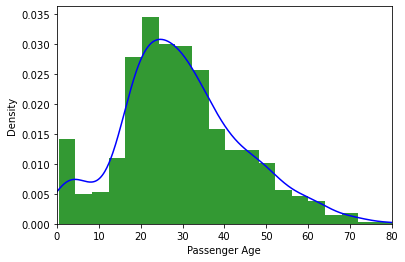

In [10]:
ax = train["Age"].hist(bins=20, density=True, stacked=True, color='green', alpha=0.8)
train["Age"].plot(kind='density', color='blue')
ax.set(xlabel='Passenger Age')
plt.xlim(0,80)
plt.show()

Determining the mean and median values for passenger age.

In [11]:
print('The mean "Age" is %.2f' %(train["Age"].mean(skipna=True)))
print('The median "Age" is %.2f' %(train["Age"].median(skipna=True)))

The mean "Age" is 29.70
The median "Age" is 28.00


Since the passenger age distribution graph above is skewed by a few passengers aged 60 years and older, the mean Age of 29.70 is almost 2 years older than the median age of 28.00. Since the median age is not impacted by the outlier older passengers, we will use the median age to fill in the 177 null values for Age in the training data and to fill in the 86 null values in the testing data.

In [12]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

### Cabin

Since 687 of the 891 samples (roughly 77%) are missing values for Cabin in the training set, we decided to exclude this feature within our Logistic Regression model by removing it from the training and testing data sets.

In [13]:
train_data.drop('Cabin', axis=1, inplace=True)

test_data.drop('Cabin', axis=1, inplace=True)

### Embarked

Determining the distribution of embarked location.

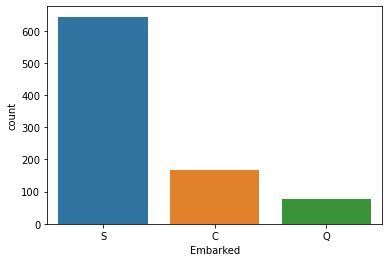

In [14]:
sns.countplot(x='Embarked', data=train)
plt.show()

The graph shows us that most passengers embarked from Southampton (S). So, we will replace the 2 null values with S.

In [15]:
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)

### Fare

Only 1 null value for Fare was present in the testing data set, but we will still replace this missing value with the median Fare from the testing data set.

In [16]:
test_data["Fare"].fillna(test["Fare"].median(skipna=True), inplace=True)

Next, we confirm that all null values have been corrected in the training set.

In [17]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Finally, we confirm that all null values have been corrected in the test set as well.

In [18]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Creating Categorical Variables

Many machine learning models require that categorical variables be encoded into numerical values. With this in mind, we encoded Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked") in both the training and testing data set. 

In [19]:
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"], drop_first=True)

testing=pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"], drop_first=True)

The get_dummies function of pandas, encodes the Sex column so that it no longer contains "male" or "female". Instead, the Sex column is broken into two columns "Sex_female" and "Sex_male" that contain a 0 or a 1 depending on the sex of the passenger. The same type of encoding is performed on the Pclass and Embarked columns. By adding drop_first=True to the code, we drop the first feature in any set of encoded features. 

For example, we don't need to keep both Sex_female and Sex_male columns, because if a passenger has a 0 for Sex_male, we automatically know they are female. For this reason, we will drop the Sex_female column from our data sets. The same can be said for Pclass_1 and Emarked_C. If Pclass_2 and Pclass_3 are both 0, then we know Pclass_1 is 1, and if Embarked_Q and Embarked_S are 0, we know Embarked_C is 1. So, we will drop those features as well.

In [20]:
training.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,846,0,"Abbing, Mr. Anthony",42.0,0,0,C.A. 5547,7.55,0,1,0,1,1
1,747,0,"Abbott, Mr. Rossmore Edward",16.0,1,1,C.A. 2673,20.25,0,1,0,1,1
2,280,1,"Abbott, Mrs. Stanton (Rosa Hunt)",35.0,1,1,C.A. 2673,20.25,0,1,0,1,0
3,309,0,"Abelson, Mr. Samuel",30.0,1,0,P/PP 3381,24.00,1,0,0,0,1
4,875,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,1,0,P/PP 3381,24.00,1,0,0,0,0


## Excluding unnecessary features

The following features hold data that cannot be used in a meaningful way for machine learning: PassengerId, Name, and Ticket. For this reason, we excluded these features from our analysis. 

In [21]:
training.drop('PassengerId', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)

training.drop('Name', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)

training.drop('Ticket', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

We can see the results of the changes we made in the training and testing sets below:

In [22]:
training.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,42.0,0,0,7.55,0,1,0,1,1
1,0,16.0,1,1,20.25,0,1,0,1,1
2,1,35.0,1,1,20.25,0,1,0,1,0
3,0,30.0,1,0,24.00,1,0,0,0,1
4,1,28.0,1,0,24.00,1,0,0,0,0


In [23]:
testing.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,13.0,0,2,20.2500,0,1,0,1,1
1,16.0,0,0,7.6500,0,1,0,1,0
2,25.0,0,0,7.6500,0,1,0,1,1
3,20.0,0,0,7.9250,0,1,0,1,1
4,18.0,0,0,7.2292,0,1,0,0,0


# Exploring the data set

## Fare

Based on the graph below, it appears that a large portion of the individuals who died paid a small Fare to board the Titanic.

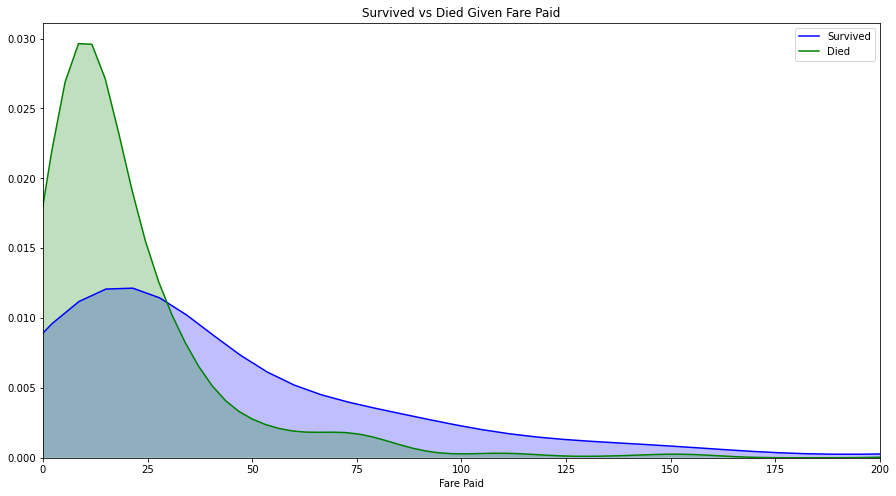

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["Fare"][training.Survived == 1], color="blue", shade=True)
sns.kdeplot(training["Fare"][training.Survived == 0], color="green", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Survived vs Died Given Fare Paid')
ax.set(xlabel='Fare Paid')
plt.xlim(0,200)
plt.show()

## Class

Similar to what we determined above with Fare, it appears that passengers in a better class were more likely to survive. Over 60% of first-class passengers survived, while less than 30% of 3rd class passengers survived. It appears that Fare and/or Class could be predictive of survival.

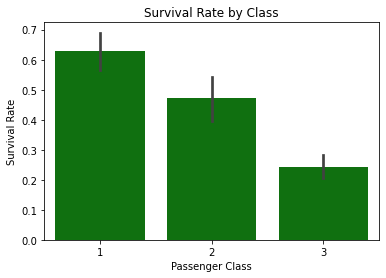

In [25]:
sns.barplot('Pclass', 'Survived', data=train, color="green")
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class')
plt.show()

## Gender

As shown below, females were far more likely to survive than males. This feature appears to be very predictive of survival due to the vast survival discrepancy between men and women. 

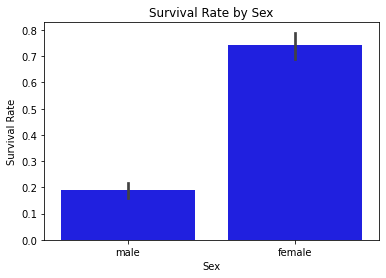

In [26]:
sns.barplot('Sex', 'Survived', data=train, color="blue")
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

## Age

From a proportional standpoint, children (ages 0 to 16) were more likely to survive than any other age group. In addition to Fare, Class, and Sex, Age might also help us predict a passenger’s likelihood of survival.

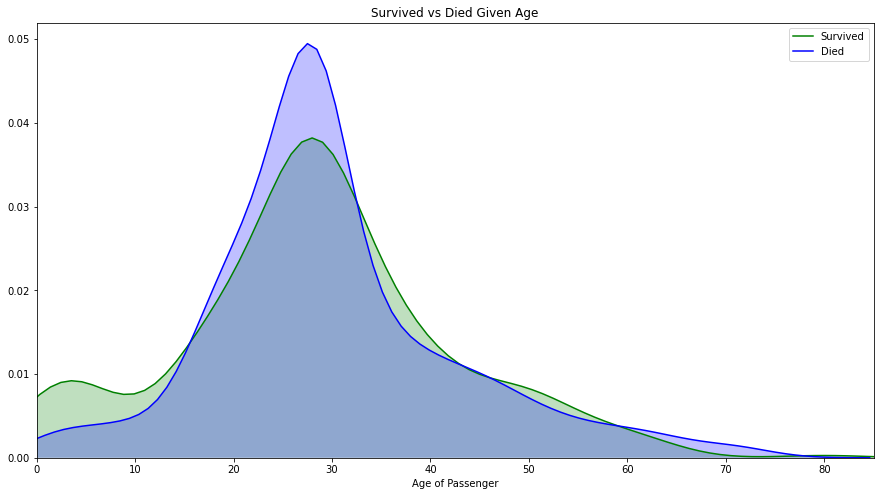

In [27]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(training["Age"][training.Survived == 1], color="green", shade=True)
sns.kdeplot(training["Age"][training.Survived == 0], color="blue", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Survived vs Died Given Age')
ax.set(xlabel='Age of Passenger')
plt.xlim(0,85)
plt.show()

# Predicting Survival Using Logistic Regression

## Feature elimination
While a few features examined above appear to help us predict survival, we want to determine if any of the features are not needed in our analysis. To determine this, we used recursive feature elimination with cross validation to reduce the number of features we would use in the logistic regression model. This helped us determine that the optimal number of features is 8, with "Fare" being excluded. The predictive impacts of Fare appear to be better captured by Class.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

cols = ["Age", "SibSp", "Parch", "Fare", "Pclass_2","Pclass_3","Embarked_Q","Embarked_S","Sex_male"] 

X = training[cols]
y = training['Survived']

rfecv = RFECV(estimator=LogisticRegression(max_iter=1000), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 8
Selected features: ['Age', 'SibSp', 'Parch', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male']


Next, we plotted the graph of number of features vs cross validation score to visualize how performance changes as features are added or removed.

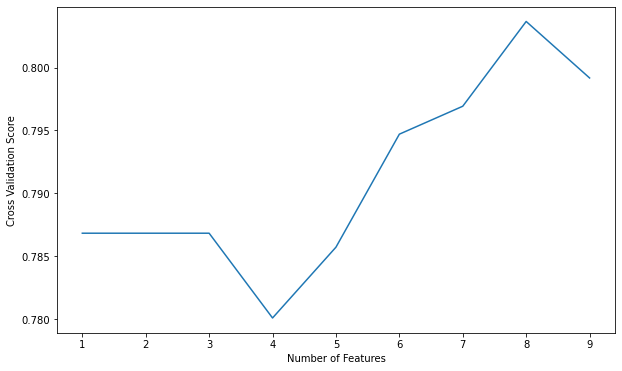

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of Features")
plt.ylabel("Cross Validation Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Logistic Regression Model Evaluation

Now we know which features we would like to use ('Age', 'SibSp', 'Parch', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'), but we need to put those features to use in our Logistic Regression model. Below we implement the model and evaluate its performance.

### Train/Test Split
First, we split the training data into two groups. 70% of the training data will be used to train the model, and the remaining 30% will be used to test performance. 

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

features = ['Age', 'SibSp', 'Parch', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male']

X = training[features]
y = training['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.811
Test set score: 0.757


The model performs decently on the training set with 0.811, but performance declines to 0.757 on the testing set.

### Grid Search
One way to potentially improve our Logistic Regression model is to fine tune model parameters. For this passenger survival task, we chose to fine tune the regularization parameter C. This parameter determines the strength of regularization of the model. Higher values of C correspond to less regularization, or less generalization to out of sample data. On the other hand, low values of C put more emphasis on producing coefficients that are closer to zero.

Rather than manually changing values of C to test model results, we used GridSearchCV to do the testing for us.

In [31]:
from sklearn.model_selection import GridSearchCV

#X = training[features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(max_iter=1000), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X_train, y_train)
results = gs.cv_results_

print("Best estimator: " + str(gs.best_estimator_))
print("Best parameter: " + str(gs.best_params_))
print('Best score:', gs.best_score_)

Best estimator: LogisticRegression(C=0.20001000000000002, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best parameter: {'C': 0.20001000000000002}
Best score: 0.8169482846902202


The results of the code above provide us with the best value to use for the C (regularization) parameter.

We updated our model to use this "best" C value and saw improvements in both training (0.819) and test set accuracy (0.780).

In [32]:
logreg = LogisticRegression(C=0.20001000000000002, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.819
Test set score: 0.780


### K-fold cross-validation: 10-fold 

Next, we used k-fold cross-validation to split our training data into 10 groups. This allowed us to see how the model performed when training and testing sets were different in each of the 10 model predictions. The result was a mean accuracy score of 0.801.

In [33]:
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("10-fold cross-validation average accuracy for Logistic Regression is %2.3f" % scores_accuracy.mean())

10-fold cross-validation average accuracy for Logistic Regression is 0.801


### Outputing Testing Predictions

The Logistic Regression model must then be deployed on the true testing set in which survival is unknown. Below, we create a csv file with the PassengerID and predicted Survival.

In [34]:
testing['Survived'] = logreg.predict(testing[features])
testing['PassengerId'] = test['PassengerId']

LogRegSubmission = testing[['PassengerId','Survived']]

LogRegSubmission.to_csv("LogRegSubmission.csv", index=False)

### Testing Accuracy

The last step of our Logistic Regression analysis involved determining how the model performed on the testing set hosted by Kaggle. The LogRegSubmission.csv file we produced above was uploaded to https://www.kaggle.com/c/titanic/submit to determine the testing accuracy score. The resulting score was 0.77511, see image below.

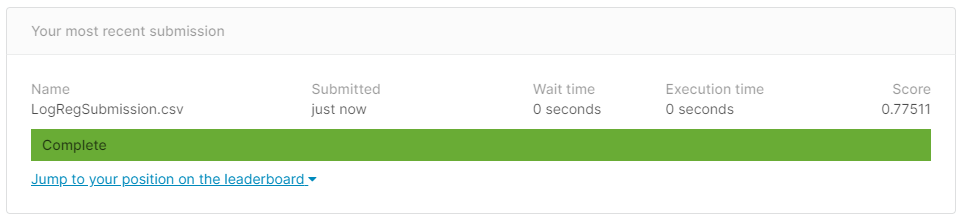

Next we tried to improve on our Logistic Regression testing accuracy results by using Artificial Neural Networks (ANNs).

# Artificial Neural Network

We will continue using the same cleaned up training and testing data that we produced during the steps above; however, we will exclude the "Survived" feature that was predicted in the testing data since we need to generate a new predicted Survival with a different model.

In [35]:
testing.drop('Survived', axis=1, inplace=True) 

Next, we scale the data for use in the Artificial Neural Network (ANN). This gets the data set into a form that can be used more effectively by the model.

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = training[features]
y = training['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Multilayer Perceptron - MLP
We chose to use a multiplayer perceptron (MLP) model to see if it could produce better predictions of survival.

Importing and instantiating the model.

In [37]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', random_state=0, max_iter=1000).fit(X_train, y_train)

This MLP model performed better than the Logistic Regression model, producing training accuracy of 0.848 and testing accuracy of 0.795.

In [38]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.848
Accuracy on testing set: 0.795


Next, we needed to deploy the model on the true testing set. We first scaled that data set for use in the model. 

In [39]:
testing_sc = sc.fit_transform(testing[features])

Below, we create a csv file with the PassengerID and predicted Survival based on the MLP model. This file will be used to see how the MLP model performed on Kaggle.

In [40]:
testing['Survived'] = mlp.predict(testing_sc)
MLPSubmission = testing[['PassengerId','Survived']]
MLPSubmission.to_csv("MLPSubmission.csv", index=False)

The MLPSubmission.csv file was uploaded to https://www.kaggle.com/c/titanic/submit to determine the testing accuracy score. The resulting score was 0.77990, see image below.

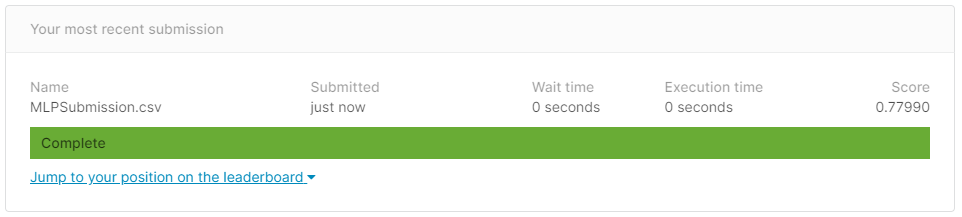

So, the MLP model was able to improve prediction slightly, going from 0.77511 (Logistic Regression) to 0.77990. 

### Multilayer Perceptron - MLP Tuned

The final portion of our neural network analysis involved trying to fine tune the MLP model to improve the score we received on Kaggle. This approach is similar to how we fine-tuned the regularization parameter C on the Logistic Regression model. Here we tuned the solver, alpha, and hidden_layer_size of the MLP model. These parameters change how the model makes predictions, and therefore could potentially improve the strength of the model. This tuning was done using Grid Search.

In [41]:
parameters = {'solver': ['lbfgs', 'adam', 'sgd'], 'alpha': 10.0 ** -np.arange(1, 8), 'hidden_layer_sizes':[(5,), (5,5), (9,), (9, 9)]}
clf = GridSearchCV(MLPClassifier(random_state=0), parameters, n_jobs=-1, cv=10)

clf.fit(X_train, y_train)

print("Best estimator: " + str(clf.best_estimator_))
print("Best parameter: " + str(clf.best_params_))
print('Best score:', clf.best_score_)

Best estimator: MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Best parameter: {'alpha': 0.1, 'hidden_layer_sizes': (5,), 'solver': 'lbfgs'}
Best score: 0.8312852022529441


We then implemented this "Best estimator" by creating a new instance of the MLPClassifier called mlpTuned. Our training and testing accuracy improved to 0.849 and 0.802 respectively. 

In [42]:
mlpTuned = MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(mlpTuned.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(mlpTuned.score(X_test, y_test)))

Accuracy on training set: 0.849
Accuracy on testing set: 0.802


Below, we create a csv file with the PassengerID and predicted Survival based on the mlpTuned model. This file will be used to see how the mlpTuned model performed any better than the original MLP model on Kaggle.

In [43]:
testing['Survived'] = mlpTuned.predict(testing_sc)
MLPTunedSubmission = testing[['PassengerId','Survived']]
MLPTunedSubmission.to_csv("MLPTunedSubmission.csv", index=False)

The MLPTunedSubmission.csv file was uploaded to https://www.kaggle.com/c/titanic/submit to determine the testing accuracy score. The resulting score was 0.77272, see image below.

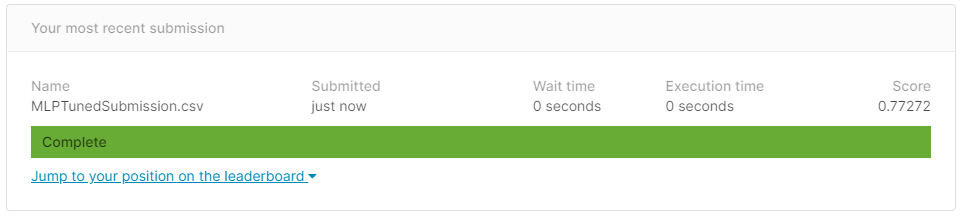

Surprisingly, the mlpTuned model did not outperform the original MLP model or the Logistic Regression model. Even though it performed better on the training data set, the mlpTuned model did not generalize as well to the testing data set.

We also explored using xgboost to improve the surival predictions on the testing data set.

In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

X = training[features]
y = training['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

After importing the XGBClassifier and splitting the data set, we fit the model.

In [59]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

The model achieved 0.79478 accuracy on the test set.

In [47]:
xgb.score(X_test, y_test)

0.7947761194029851

We also fine tuned the hyperparameters to improve our predictions.

In [60]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

gbm = XGBClassifier(n_estimators=10)
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


xgb_random.fit(X, y)

print("Best parameters: ", xgb_random.best_params_)
print("Best accuracy score: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:  {'n_estimators': 9, 'max_depth': 7, 'learning_rate': 0.4, 'colsample_bytree': 0.9}
Best accuracy score:  0.8137043994667312


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.5s finished


Then, we created a csv file with the PassengerID and predicted Survival based on the xgboost model. This file was used to see how the model performed on Kaggle.

In [61]:
testing['Survived'] = xgb_random.predict(testing[features])
XGBSubmission = testing[['PassengerId','Survived']]
XGBSubmission.to_csv("XGBSubmission.csv", index=False)

The XGBSumission.csv file was uploaded to https://www.kaggle.com/c/titanic/submit to determine the testing accuracy score. The resulting score was 0.76555, see image below.

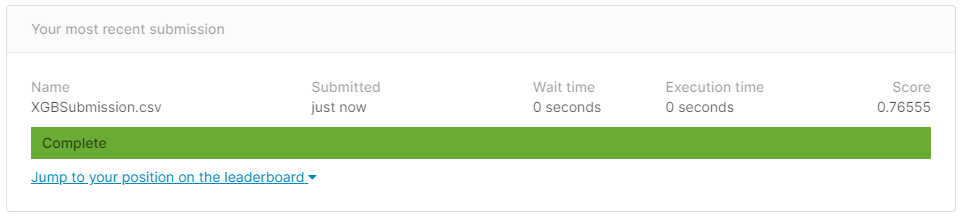

Of the machine learning models tested in this portion of our project, the best model was the MLPClassifier with a testing accuracy score of 0.77990.